![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions. This data does contain null values and some outliers, but handling these is out of scope for the project. Feel free to experiment after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

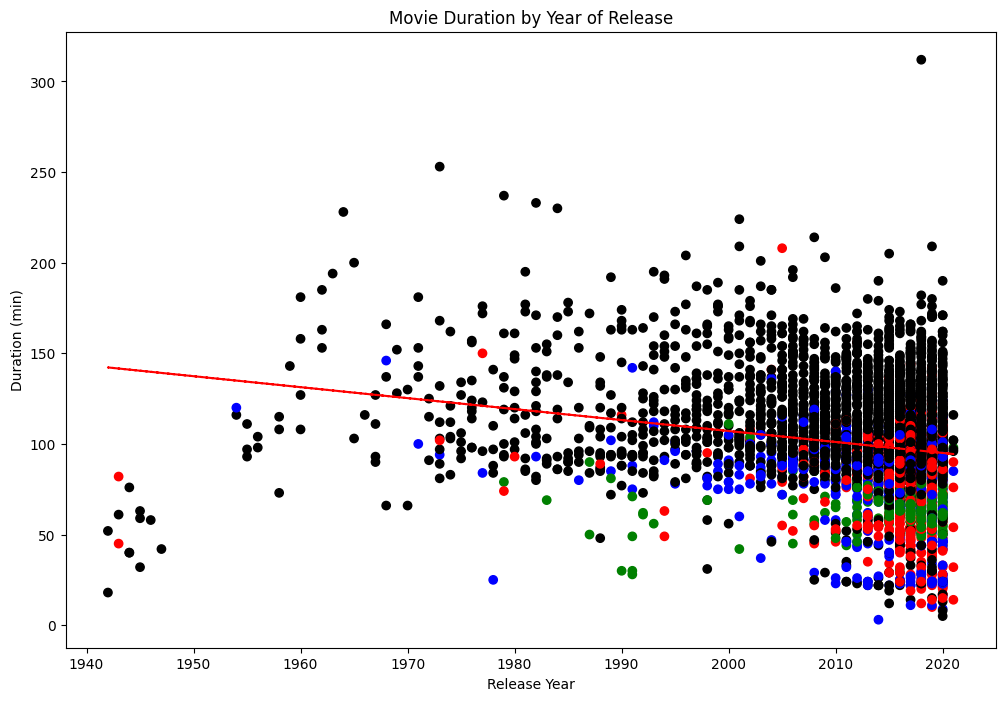

In [3]:
# Importing pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

netflix_df = pd.read_csv('netflix_data.csv', index_col=0)

# Filter the data to remove TV shows and store as netflix_subset
subset = netflix_df['type'] == 'Movie'  
netflix_subset = netflix_df[subset]

# Investigate and subset the Netflix movie data, keeping needed columns into a new DataFrame 
netflix_movies = netflix_subset[["title", "country", "genre", "release_year", "duration"]]

hour = netflix_movies["duration"] < 60
short_movies = netflix_movies[hour]

for x, y in netflix_movies.iterrows():
    if y['genre'] == 'Children':
        netflix_movies.loc[x, 'colors'] = 'blue'
    elif y['genre'] == 'Documentaries':
        netflix_movies.loc[x, 'colors'] = 'red'
    elif y['genre'] == 'Stand-Up':
        netflix_movies.loc[x, 'colors'] = 'green'
    else:
        netflix_movies.loc[x, 'colors'] = 'black'

# Create a scatter plot
fig = plt.figure()
fig.set_size_inches(12, 8)

plt.scatter(netflix_movies["release_year"], netflix_movies["duration"], c=netflix_movies["colors"])
plt.xlabel("Release Year")  
plt.ylabel("Duration (min)")  
plt.title("Movie Duration by Year of Release")  

# Calculate the trendline
z = np.polyfit(netflix_movies["release_year"], netflix_movies["duration"], 1)
p = np.poly1d(z)

# Plot the trendline
plt.plot(netflix_movies["release_year"], p(netflix_movies["release_year"]), "r--")

fig.savefig('scatter_plot.png')
plt.show()

answer="no"